In [1]:
import pandas as pd
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="dark")
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# deal with data

In [2]:
df=pd.read_csv("ex1data1.txt",sep=",",names=['population','profit'])
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


/home/hxy/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


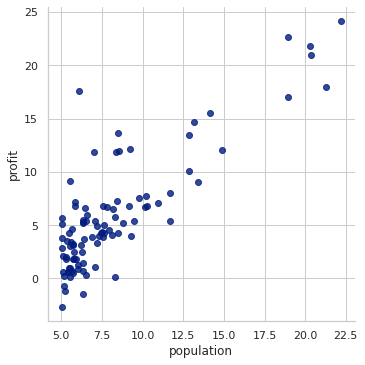

In [4]:
sns.lmplot('population','profit',df,fit_reg=False)
plt.show()

In [5]:
def get_x(df):
    ones=pd.DataFrame({'ones':np.ones(len(df))})
    data=pd.concat([ones,df],axis=1)
    return data.iloc[:,:-1].values

In [6]:
x=get_x(df)
x[0:2]

array([[1.    , 6.1101],
       [1.    , 5.5277]])

In [7]:
def get_y(df):
    return df.iloc[:,-1].values

In [8]:
y=get_y(df)
y

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [9]:
def normalize_feature(df):
    return df.apply(lambda column:(column-column.mean())/column.std)

In [10]:
theta=np.zeros(len(x[0]))

# algorithm

In [11]:
def lr_cost(x,y,theta):
    m=len(x)
    
    inner=x@theta-y
    cost=inner.T@inner
    return cost/(2*m)

In [12]:
ephoch=500
alpha=0.01

In [18]:
def gradient(x,y,theta,alpha):
    m=len(x)
    costlist=[]
    _theta=theta.copy()
    for num_iter in range(ephoch):
        delta=batch_gradient(x,y,_theta)
        _theta=_theta-alpha*delta
        costlist.append(lr_cost(x,y,_theta))
    return _theta,costlist

In [19]:
def batch_gradient(x,y,theta):
    m=len(x)
    inner=x@theta-y
    inner2=x.T@inner
    return inner2/m

In [20]:
final_theta,costlist=gradient(x,y,theta,alpha)

In [21]:
final_theta

array([-2.28286727,  1.03099898])

In [22]:
costlist

[6.737190464870012,
 5.931593568604956,
 5.901154707081388,
 5.895228586444221,
 5.89009494311733,
 5.885004158443644,
 5.879932480491418,
 5.874879094762573,
 5.869843911806388,
 5.8648268653129305,
 5.8598278899321805,
 5.85484692057229,
 5.849883892376588,
 5.844938740722034,
 5.8400114012183595,
 5.8351018097072265,
 5.830209902261388,
 5.825335615183862,
 5.820478885007098,
 5.815639648492154,
 5.810817842627869,
 5.806013404630045,
 5.801226271940628,
 5.796456382226899,
 5.791703673380653,
 5.7869680835173956,
 5.782249550975539,
 5.777548014315596,
 5.772863412319381,
 5.768195683989214,
 5.76354476854712,
 5.758910605434049,
 5.7542931343090755,
 5.749692295048627,
 5.745108027745684,
 5.740540272709012,
 5.735988970462381,
 5.731454061743792,
 5.726935487504702,
 5.722433188909257,
 5.717947107333528,
 5.713477184364749,
 5.709023361800549,
 5.704585581648199,
 5.700163786123856,
 5.6957579176518145,
 5.691367918863751,
 5.68699373259798,
 5.682635301898707,
 5.67829257001529

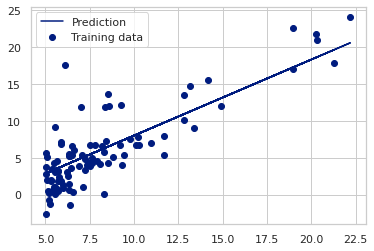

In [24]:
b = final_theta[0] # intercept，Y轴上的截距
m = final_theta[1] # slope，斜率

plt.scatter(df.population, df.profit, label="Training data")
plt.plot(df.population, df.population*m + b, label="Prediction")
plt.legend(loc=2)
plt.show()